In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_customers = 200

data = {
    "CustomerID": range(1, num_customers + 1),
    "Age": np.random.randint(18, 65, num_customers),
    "Annual_Income": np.random.randint(20000, 150000, num_customers),
    "Spending_Score": np.random.randint(1, 100, num_customers)
}

df = pd.DataFrame(data)

# Save CSV
df.to_csv("customer_data.csv", index=False)

df.head()


,CustomerID,Age,Annual_Income,Spending_Score
0,1,56,72733,93
1,2,46,85318,46
2,3,32,129953,6
3,4,60,109474,99
4,5,25,43664,37


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      200 non-null    int64
 1   Age             200 non-null    int64
 2   Annual_Income   200 non-null    int64
 3   Spending_Score  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,41.570000,86000.180000,50.225000
std,57.879185,13.715527,38901.475958,29.179128
min,1.000000,18.000000,20854.000000,1.000000
25%,50.750000,30.000000,54201.250000,24.000000
50%,100.500000,42.000000,86931.000000,50.500000
75%,150.250000,54.000000,121253.250000,69.250000
max,200.000000,64.000000,149307.000000,99.000000


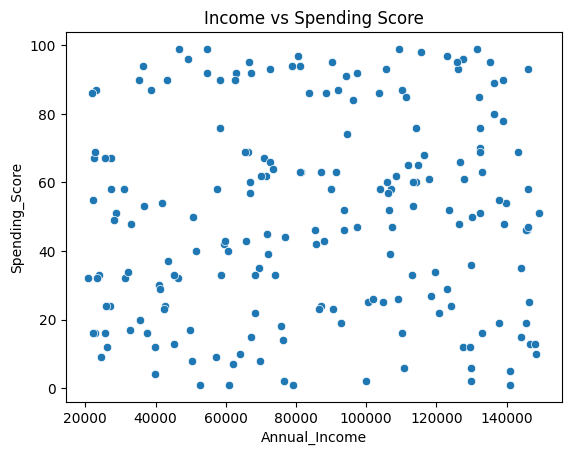

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.scatterplot(x="Annual_Income", y="Spending_Score", data=df)
plt.title("Income vs Spending Score")
plt.show()


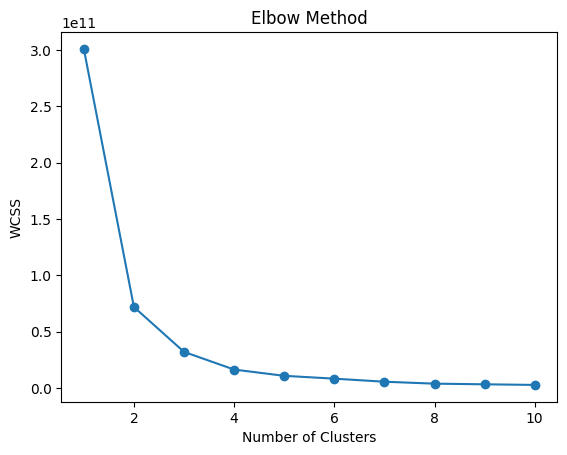

In [4]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[["Annual_Income", "Spending_Score"]])
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [5]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Annual_Income", "Spending_Score"]])

df.head()


,CustomerID,Age,Annual_Income,Spending_Score,Cluster
0,1,56,72733,93,3
1,2,46,85318,46,2
2,3,32,129953,6,0
3,4,60,109474,99,2
4,5,25,43664,37,1


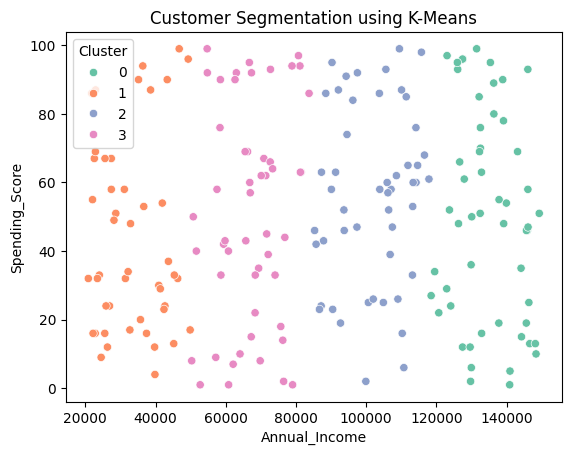

In [6]:
plt.figure()
sns.scatterplot(
    x="Annual_Income",
    y="Spending_Score",
    hue="Cluster",
    data=df,
    palette="Set2"
)
plt.title("Customer Segmentation using K-Means")
plt.show()


In [7]:
df.groupby("Cluster").mean()


,CustomerID,Age,Annual_Income,Spending_Score
Cluster,,,,
0,97.773585,41.000000,134811.056604,49.830189
1,102.521739,37.760870,33272.760870,43.739130
2,92.740000,42.500000,101961.880000,56.120000
3,109.117647,44.686275,67184.490196,50.705882


In [8]:
# Create Spending Category
def spending_category(score):
    if score < 30:
        return "Low Spender"
    elif score < 70:
        return "Medium Spender"
    else:
        return "High Spender"

df["Spending_Category"] = df["Spending_Score"].apply(spending_category)
df.head()



,CustomerID,Age,Annual_Income,Spending_Score,Cluster,Spending_Category
0,1,56,72733,93,3,High Spender
1,2,46,85318,46,2,Medium Spender
2,3,32,129953,6,0,Low Spender
3,4,60,109474,99,2,High Spender
4,5,25,43664,37,1,Medium Spender


In [9]:
cluster_profile = df.groupby("Cluster").agg({
    "Age": "mean",
    "Annual_Income": "mean",
    "Spending_Score": "mean",
    "CustomerID": "count"
}).rename(columns={"CustomerID": "Total_Customers"})

cluster_profile


,Age,Annual_Income,Spending_Score,Total_Customers
Cluster,,,,
0,41.000000,134811.056604,49.830189,53
1,37.760870,33272.760870,43.739130,46
2,42.500000,101961.880000,56.120000,50
3,44.686275,67184.490196,50.705882,51


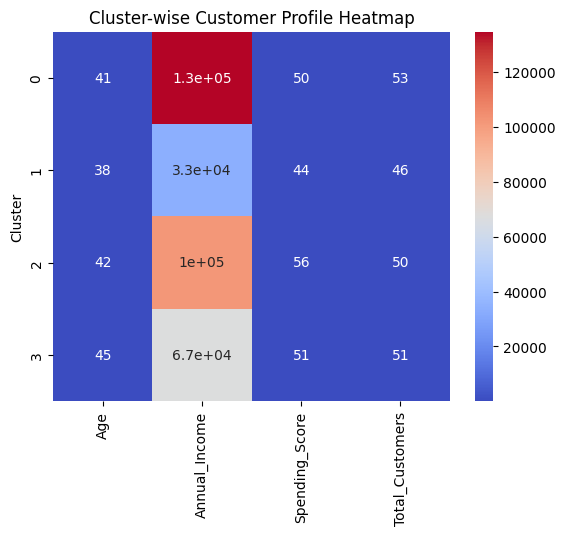

In [10]:
plt.figure()
sns.heatmap(cluster_profile, annot=True, cmap="coolwarm")
plt.title("Cluster-wise Customer Profile Heatmap")
plt.show()


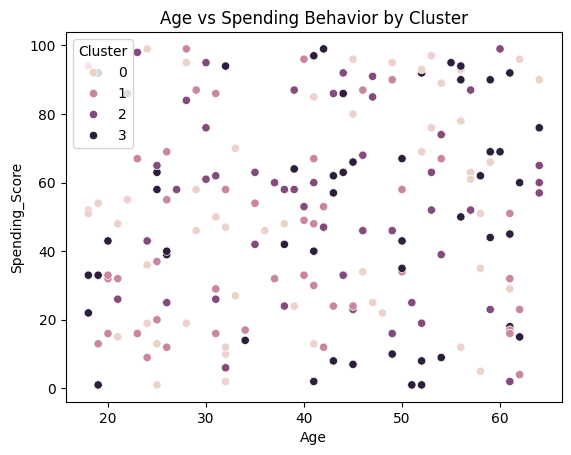

In [11]:
plt.figure()
sns.scatterplot(
    x="Age",
    y="Spending_Score",
    hue="Cluster",
    data=df
)
plt.title("Age vs Spending Behavior by Cluster")
plt.show()


In [12]:
def customer_type(row):
    if row["Annual_Income"] > 100000 and row["Spending_Score"] > 70:
        return "Premium Customer"
    elif row["Spending_Score"] > 70:
        return "High Potential Customer"
    elif row["Spending_Score"] < 30:
        return "Low Engagement Customer"
    else:
        return "Regular Customer"

df["Customer_Type"] = df.apply(customer_type, axis=1)
df.head()


,CustomerID,Age,Annual_Income,Spending_Score,Cluster,Spending_Category,Customer_Type
0,1,56,72733,93,3,High Spender,High Potential Customer
1,2,46,85318,46,2,Medium Spender,Regular Customer
2,3,32,129953,6,0,Low Spender,Low Engagement Customer
3,4,60,109474,99,2,High Spender,Premium Customer
4,5,25,43664,37,1,Medium Spender,Regular Customer


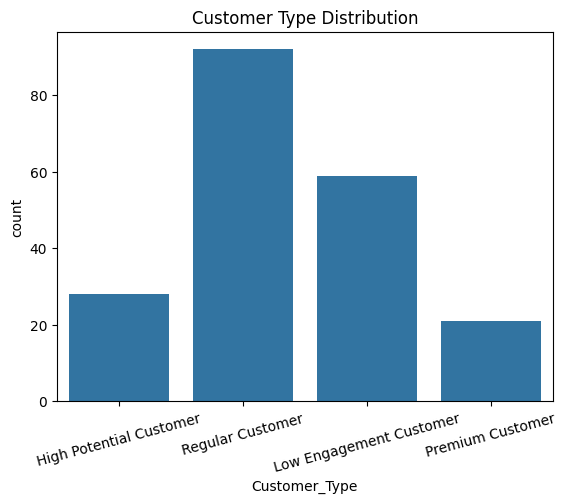

In [13]:
plt.figure()
sns.countplot(x="Customer_Type", data=df)
plt.title("Customer Type Distribution")
plt.xticks(rotation=15)
plt.show()


In [14]:
df.to_csv("CodeAlpha_Task3_Advanced_Customer_Segmentation.csv", index=False)
